### SIR Model

The SIR model is a differential equation model described by the following equations

$$\begin{array}{rcl}
    \frac{dS}{dt} &=& - \beta \left( \frac{SI}{N}\right) \\\\
    \frac{dI}{dt} &=& \beta \left( \frac{SI}{N}\right) - \gamma I \\\\
    \frac{dR}{dt} &=& \gamma I
\end{array}$$

where $S$, $I$ and $R$ are the number of persons in the community that are susceptible, infectious, and recovered, respectively. 

Let's gather all the stuff on the right hand sides of the the equal signs into functions so that

$$\begin{array}{rcl}
    \frac{dS}{dt} &=& f(S,I,R,\beta,\gamma, N) \\\\
    \frac{dI}{dt} &=& g(S,I,R,\beta,\gamma, N) - \gamma I \\\\
    \frac{dR}{dt} &=& h(S,I,R,\beta,\gamma, N)
\end{array}$$


In [58]:
################################
# Functions used in SIR Model ##
################################
def f(s,i,r,beta,gamma,N): 
    # From dS/dt equation
    return -beta*i*s/N 
def g(s,i,r,beta,gamma,N): 
    # From dI/dt equation
    return beta*i*s/N - gamma*i
def h(s,i,r,beta,gamma,N): 
    # From dR/dt equation
    return gamma*i

Define the SIR model parameters

In [59]:
#########################
# SIR model parameters ##
#########################
N = 1000        # Population size
beta = .4       # Play with .2, .4, .8, .99 in class
gamma = .1      # Rate at which infectious individuals recover
dt = 0.1        # Numerical integration time step
duration = 140  # Simulation duration 

Define a function to perform Euler integration, which approximates the behavior of a differential equation by saying that

$$x(t+\Delta t) \approx x(t) + \Delta t \frac{dx}{dt}$$

In [60]:
from typing import Tuple
# Note that I'm using global variables. Bad Mike!
def euler_integration(s: float, 
                      i: float,
                      r: float) -> Tuple[float, float, float]:
    s_next: float = s + dt * f(s, i, r, beta, gamma, N)
    i_next: float = i + dt * g(s, i, r, beta, gamma, N)
    r_next: float = r + dt * h(s, i, r, beta, gamma, N)
    return (s_next, i_next, r_next)

Run the simulation and append all the values into lists

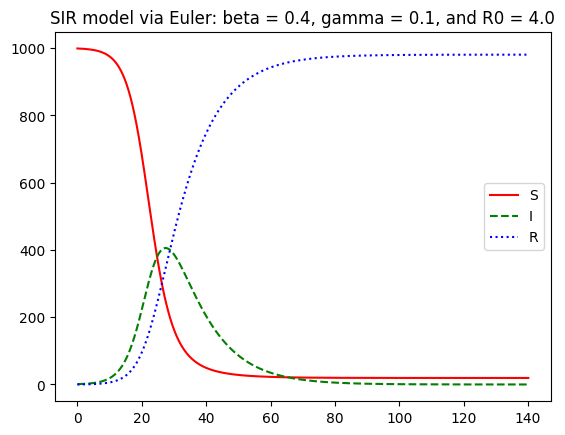

In [61]:
import matplotlib.pyplot as plt

def run_and_plot() -> None:
    ########################################
    # Initialize states of the population ##
    ########################################
    S: list[float] = [N-1]
    I: list[float] = [1]
    R: list[float] = [0]
    t: list[float] = [0]
    while t[-1] < duration:
        s_next, i_next, r_next = euler_integration(S[-1], I[-1], R[-1])
        S.append(s_next)
        I.append(i_next)
        R.append(r_next)
        t.append(t[-1]+dt)

    plt.plot(t,S,'r',t,I,'g--',t,R,'b:')
    plt.legend(['S','I','R'])
    title = 'SIR model via Euler: beta = ' + str(beta) + ', gamma = ' + str(gamma) + ', and R0 = ' + str(beta/gamma)
    plt.title(title)

run_and_plot()


Let's pull the pieces into a class

In [62]:
from typing import Tuple
import matplotlib.pyplot as plt
class SIR_simulation:
    def __init__(self, 
                 m: float,          # Probability of contact with another person
                 p: float,          # Probability of transfer of infectious person to susceptible person
                 gamma: float,      # Probability that infectious person recovers in current time step
                 dt: float,         # Size of time step
                 duration: int,     # Amount of time for simulation
                 s0: int,           # Number of people initially susceptible
                 i0: int,           # Number of people initially infectious
                 r0: int            # Number of people initially recovered
                 ) -> None:  
        # Global SIR parameters
        self.N: int = s0 + i0 + r0  # Initial population size
        self.beta: float = m * p    # Beta parameter is rate at which susceptible people become infectious
        self.gamma: float = gamma
        # List of population number per compartment in SIR model
        self.S: list[float] = [s0]
        self.I: list[float] = [i0]
        self.R: list[float] = [r0]
        # Simulation parameters
        self.t: list[float] = [0]
        self.dt: float = dt
        self.duration: int = duration
    
    def run_simulation(self) -> None:
        while self.t[-1] < self.duration:
            s_next, i_next, r_next = self.euler_integration(self.S[-1], self.I[-1], self.R[-1])
            self.S.append(s_next)
            self.I.append(i_next)
            self.R.append(r_next)
            self.t.append(self.t[-1] + self.dt)
    
    ###########################
    ## Integration functions ##
    ###########################
    def euler_integration(self,
                          s: float, 
                          i: float,
                          r: float
                          ) -> Tuple[float, float, float]:
        #############################
        # Euler integration method ##
        #############################    
        s_next: float = s + self.dt * self.f(s, i, r)
        i_next: float = i + self.dt * self.g(s, i, r)
        r_next: float = r + self.dt * self.h(s, i, r)
        return (s_next, i_next, r_next)
    
    def midpoint_integration(self,
                             s: float,
                             i: float,
                             r: float
                             ) -> Tuple[float, float, float]:
        ################################
        # Midpoint integration method ##
        ################################                     
        s_next: float = s + self.dt/2 * self.f(s,i,r)
        i_next: float = i + self.dt/2 * self.h(s,i,r)
        r_next: float = r + self.dt/2 * self.g(s,i,r)
        return (s_next, i_next, r_next)
        
    #################################
    ## Functions used in SIR Model ##
    #################################
    def f(self,s,i,r) -> float: 
        # From dS/dt equation
        return -self.beta * i * s /self.N 
    def g(self,s,i,r) -> float: 
        # From dI/dt equation
        return self.beta * i * s /self.N - self.gamma*i
    def h(self,s,i,r) -> float: 
        # From dR/dt equation
        return self.gamma*i
    
    ## Plotting functions ##
    def show_plot(self) -> None:
        plt.plot(self.t,self.S,'r',
                 self.t,self.I,'g--',
                 self.t,self.R,'b:')
        plt.legend(['S','I','R'])
        title = 'SIR model via Euler: beta = ' \
            + str(self.beta) \
            + ', gamma = ' + str(self.gamma) \
            + ', and R0 = ' + str(self.beta/self.gamma)
        plt.title(title)
    

Let's replicate the first plot we created above

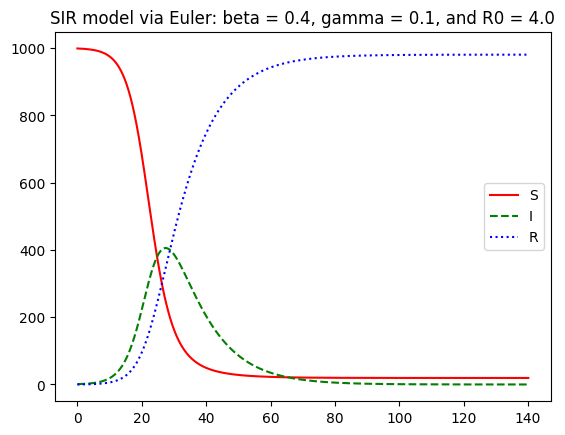

In [63]:
m = 1   # Always meet someone
p = 0.4 # Infectious person transmits to susceptible person if they meet
gamma = 0.1 # Rate of recovery
N = 1000
s0 = N-1
i0 = 1
r0 = 0
dt = 0.1
duration = 140
baseline_simulation: SIR_simulation = SIR_simulation(m,
                                        p,
                                        gamma,
                                        dt,
                                        duration,
                                        s0,
                                        i0,
                                        r0)
baseline_simulation.run_simulation()
baseline_simulation.show_plot()

**Prediction** What happens if we double the population size?

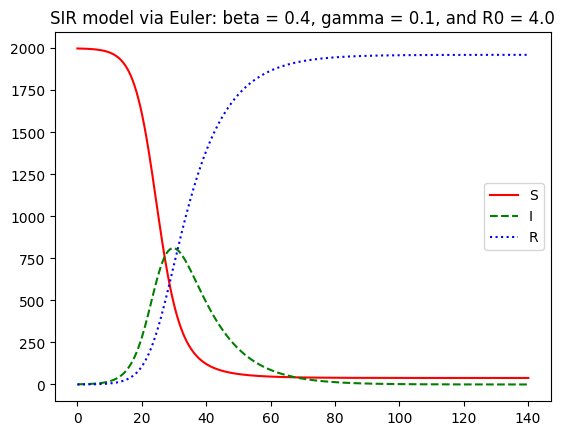

In [64]:
m = 1   # Always meet someone
p = 0.4 # Infectious person transmits to susceptible person if they meet
gamma = 0.1 # Rate of recovery
N = 2000
s0 = N-1
i0 = 1
r0 = 0
dt = 0.1
duration = 140
doubled_simulation: SIR_simulation = SIR_simulation(m,
                                        p,
                                        gamma,
                                        dt,
                                        duration,
                                        s0,
                                        i0,
                                        r0)
doubled_simulation.run_simulation()
doubled_simulation.show_plot()

Double the probability of transmission

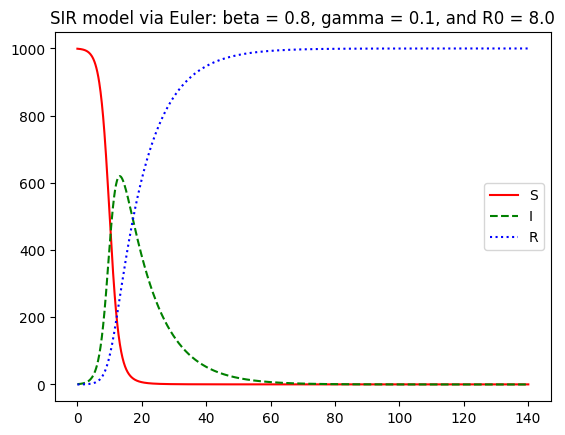

In [65]:
m = 1   # Always meet someone
p = 0.8 # Infectious person transmits to susceptible person if they meet
gamma = 0.1 # Rate of recovery
N = 1000
s0 = N-1
i0 = 1
r0 = 0
dt = 0.1
duration = 140
doubled_simulation: SIR_simulation = SIR_simulation(m,
                                        p,
                                        gamma,
                                        dt,
                                        duration,
                                        s0,
                                        i0,
                                        r0)
doubled_simulation.run_simulation()
doubled_simulation.show_plot()

Doubled recovery rate

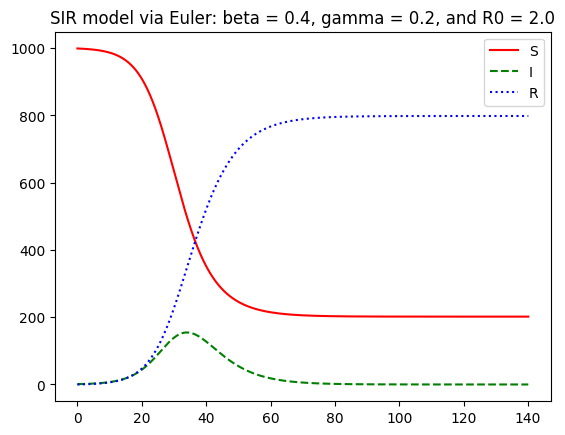

In [55]:
m = 1   # Always meet someone
p = 0.4 # Infectious person transmits to susceptible person if they meet
gamma = 0.2 # Rate of recovery
N = 1000
s0 = N-1
i0 = 1
r0 = 0
dt = 0.1
duration = 140
doubled_simulation: SIR_simulation = SIR_simulation(m,
                                        p,
                                        gamma,
                                        dt,
                                        duration,
                                        s0,
                                        i0,
                                        r0)
doubled_simulation.run_simulation()
doubled_simulation.show_plot()